In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from mlxtend .feature_selection import SequentialFeatureSelector as sfs

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

### Attributes Description

ID	--> Unique Identifier for a row<br>
City_Code -->	Code for the City of the customers<br>
Region_Code -->	Code for the Region of the customers<br>
Accomodation_Type -->	Customer Owns or Rents the house<br>
Reco_Insurance_Type -->	Joint or Individual type for the recommended insurance  <br>
Upper_Age -->	Maximum age of the customer <br>
Lower _Age -->	Minimum age of the customer<br>
Is_Spouse -->	If the customers are married to each other (in case of joint insurance) <br>
Health_Indicator --> Encoded values for health of the customer<br>
Holding_Policy_Duration	--> Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)<br>
Holding_Policy_Type --> Type of holding policy<br>
Reco_Policy_Cat	--> Encoded value for recommended health insurance<br>
Reco_Policy_Premium -->	Annual Premium (INR) for the recommended health insurance<br>
Response (Target) -->	
* 0 : Customer did not show interest in the recommended policy,
* 1 : Customer showed interest in the recommended policy

In [2]:
train = pd.read_csv("C:/Users/91899/Desktop/Analyatics Vidhya/Health Insurance Lead Prediction/train.csv")
test = pd.read_csv("C:/Users/91899/Desktop/Analyatics Vidhya/Health Insurance Lead Prediction/test.csv")

In [3]:
train.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [4]:
train.shape

(50882, 14)

In [5]:
# Lets find out the datatypes of features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB


In [6]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
ID                         21805 non-null int64
City_Code                  21805 non-null object
Region_Code                21805 non-null int64
Accomodation_Type          21805 non-null object
Reco_Insurance_Type        21805 non-null object
Upper_Age                  21805 non-null int64
Lower_Age                  21805 non-null int64
Is_Spouse                  21805 non-null object
Health Indicator           16778 non-null object
Holding_Policy_Duration    13202 non-null object
Holding_Policy_Type        13202 non-null float64
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [8]:
# Lets find if there are any Nan values
train.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [9]:
test.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [10]:
(train.isna().sum()/train.shape[0]) * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [11]:
(test.isna().sum()/test.shape[0]) * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [12]:
# Approximately 40% of the data is Nan in Holding_Policy_Duration and Holding_Policy_type.
# So instead of filling it with some values which we don't know it would be good for our modeling, let's drop these columns.
# So, Health Indicator is also having 23% Nan values, let's drop this column also.

In [13]:
train_df = train.drop(["Health Indicator", "Holding_Policy_Duration", "Holding_Policy_Type", "Lower_Age","ID"], axis =1, inplace = False)
test_df = test.drop(["Health Indicator", "Holding_Policy_Duration", "Holding_Policy_Type", "Lower_Age", "ID"], axis =1, inplace = False)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 9 columns):
City_Code              50882 non-null object
Region_Code            50882 non-null int64
Accomodation_Type      50882 non-null object
Reco_Insurance_Type    50882 non-null object
Upper_Age              50882 non-null int64
Is_Spouse              50882 non-null object
Reco_Policy_Cat        50882 non-null int64
Reco_Policy_Premium    50882 non-null float64
Response               50882 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 3.5+ MB


In [15]:
train_df["Region_Code"].unique()

array([3213, 1117, 3732, ..., 5326, 6149, 5450], dtype=int64)

In [16]:
train_df["Response"].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [17]:
# It is an imbalanced dataset
(train_df["Response"].value_counts()[0]/ train_df["Response"].value_counts()[1]) 

3.1675812924891473

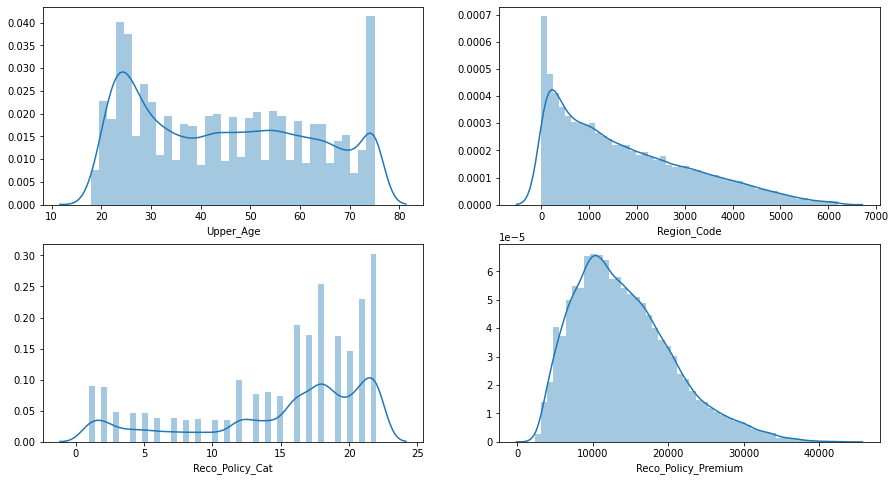

In [18]:
fig, axes = plt.subplots( 2,2 , figsize = (15,8))
sns.distplot(train["Upper_Age"], ax = axes[0,0])
sns.distplot(train["Region_Code"], ax = axes[0,1])
sns.distplot(train["Reco_Policy_Cat"], ax = axes[1,0])
sns.distplot(train["Reco_Policy_Premium"], ax = axes[1,1])
plt.show()

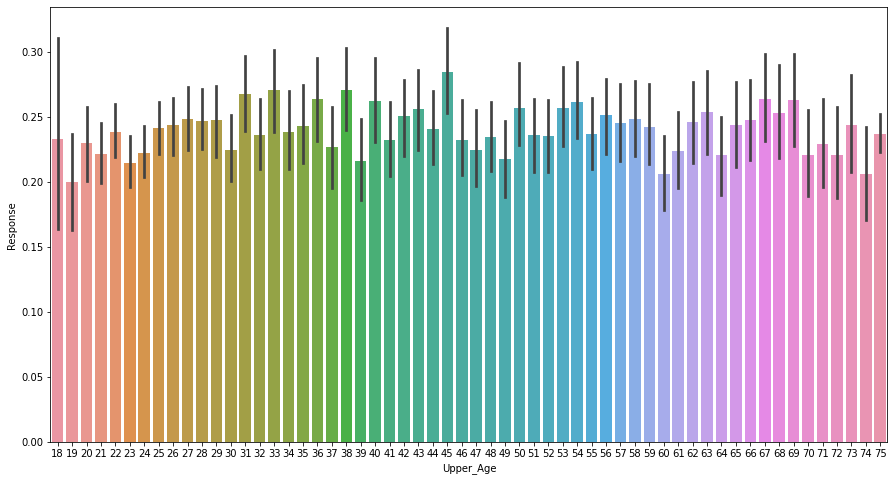

In [21]:
sns.barplot(train["Upper_Age"], train["Response"])
plt.show()

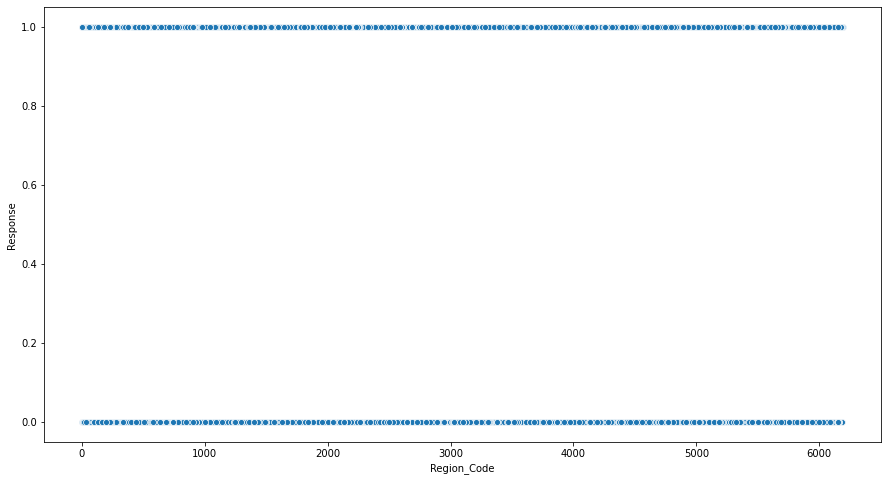

In [22]:
sns.scatterplot(train["Region_Code"], train["Response"])
plt.show()

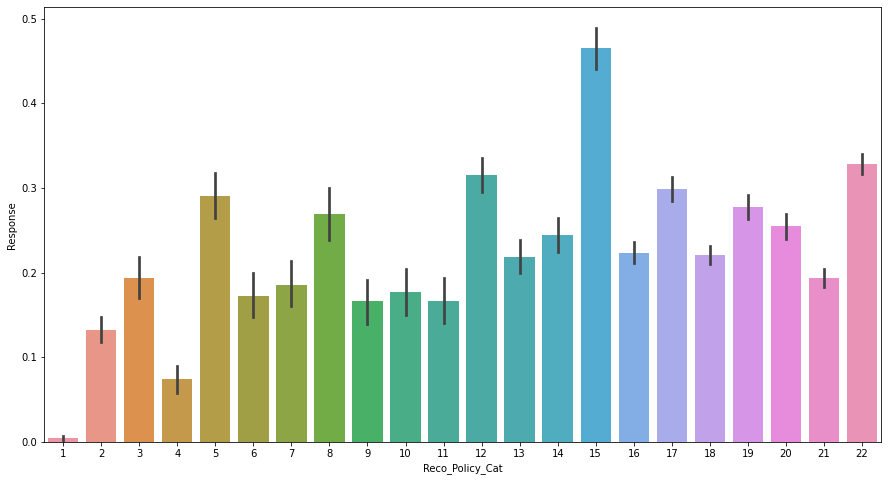

In [23]:
sns.barplot(train["Reco_Policy_Cat"], train["Response"])
plt.show()

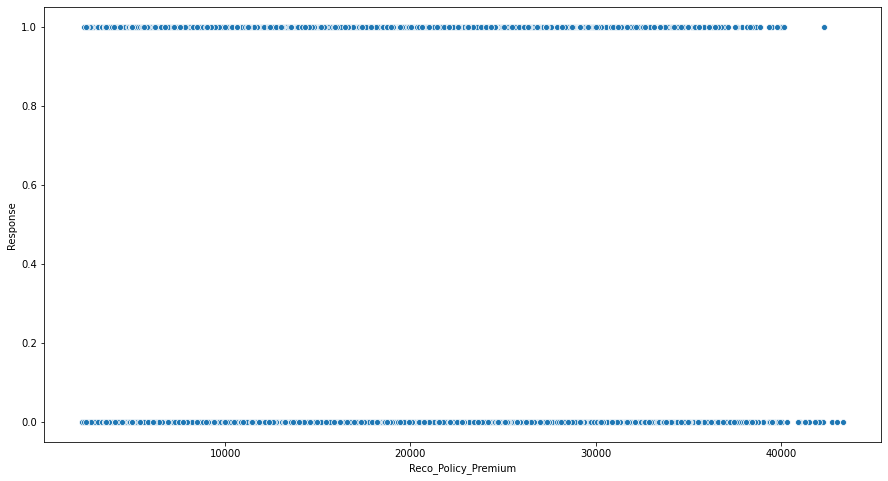

In [24]:
sns.scatterplot(train["Reco_Policy_Premium"], train["Response"])
plt.show()

In [25]:
## Feature Engineering

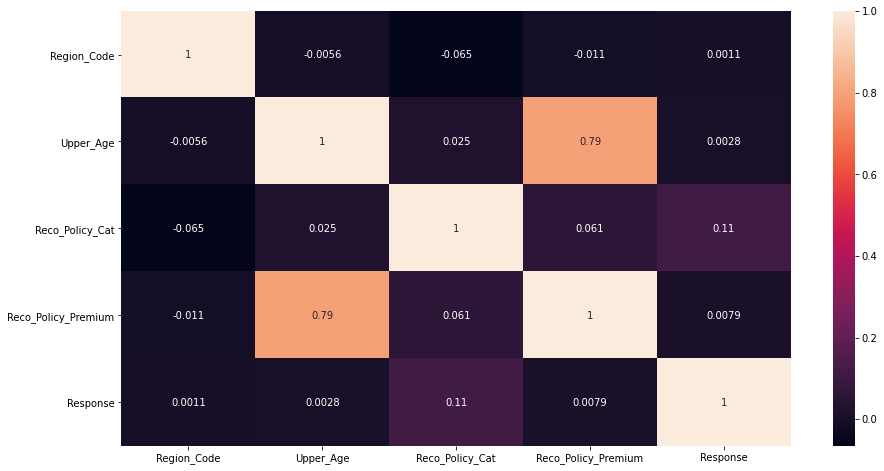

In [26]:
sns.heatmap(train_df.corr(), annot = True)
plt.show()

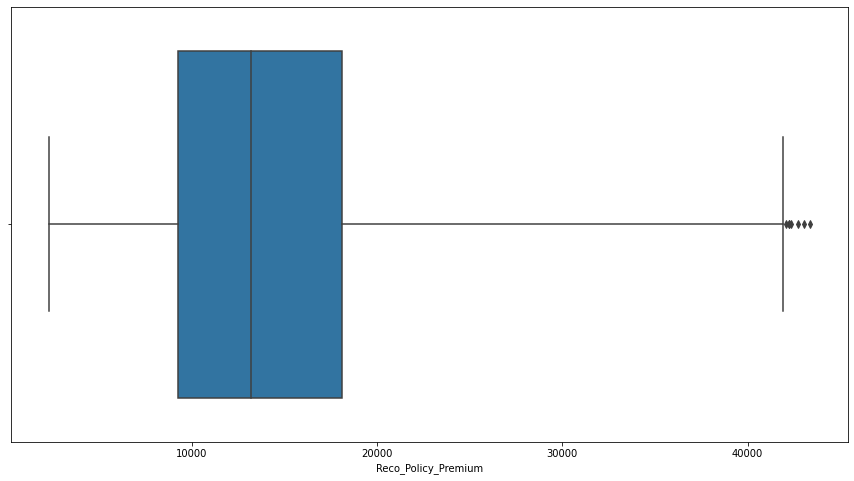

In [27]:
sns.boxplot(train_df["Reco_Policy_Premium"], whis = 2.7)
plt.show()

In [28]:
q1 = train_df['Reco_Policy_Premium'].quantile(0.25)
q3 = train_df['Reco_Policy_Premium'].quantile(0.75)
IQR = q3 - q1
IQR

8848.0

In [29]:
upper_limit = q3 + 2.7*IQR
upper_limit

41985.600000000006

In [30]:
lower_limit = q1 - 1.5*IQR
lower_limit

-4024.0

In [31]:
train_df[train_df['Reco_Policy_Premium'] > upper_limit]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Response
1905,C24,1868,Owned,Joint,75,No,22,42316.8,1
5826,C1,1732,Rented,Joint,73,No,6,42240.0,0
7080,C2,1717,Owned,Joint,75,No,18,43350.4,0
7975,C2,2329,Rented,Joint,75,Yes,22,42256.0,0
14908,C7,5033,Owned,Joint,75,Yes,21,42066.0,0
44606,C1,1823,Owned,Joint,74,Yes,21,42739.2,0
46547,C24,1194,Owned,Joint,75,No,19,43046.4,0


In [32]:
train_df.drop(train_df[train_df['Reco_Policy_Premium'] > upper_limit].index, axis =0, inplace = True)

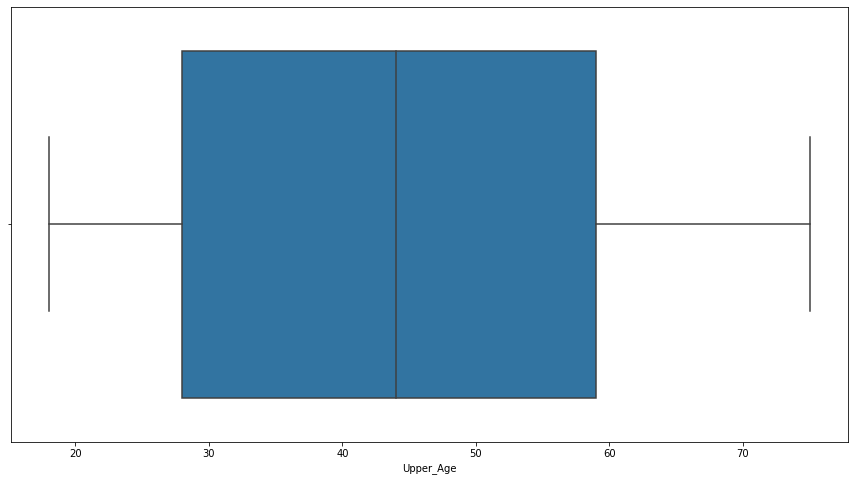

In [33]:
sns.boxplot(train_df["Upper_Age"])
plt.show()

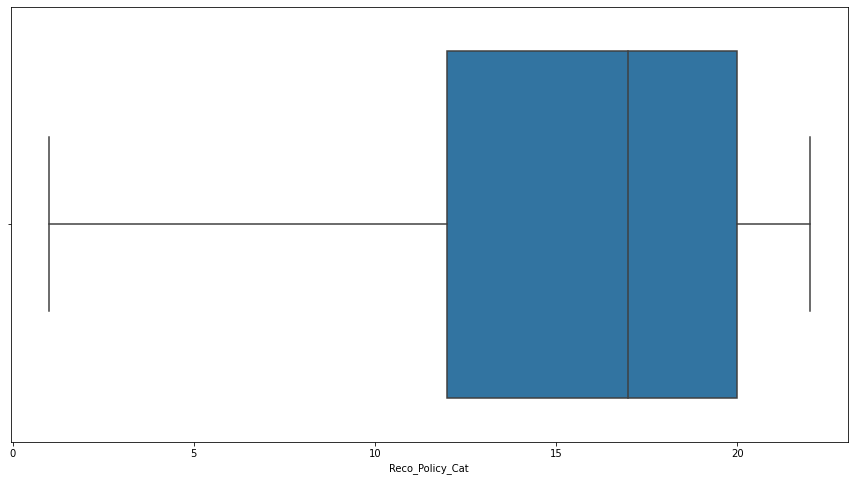

In [34]:
sns.boxplot(train_df["Reco_Policy_Cat"])
plt.show()

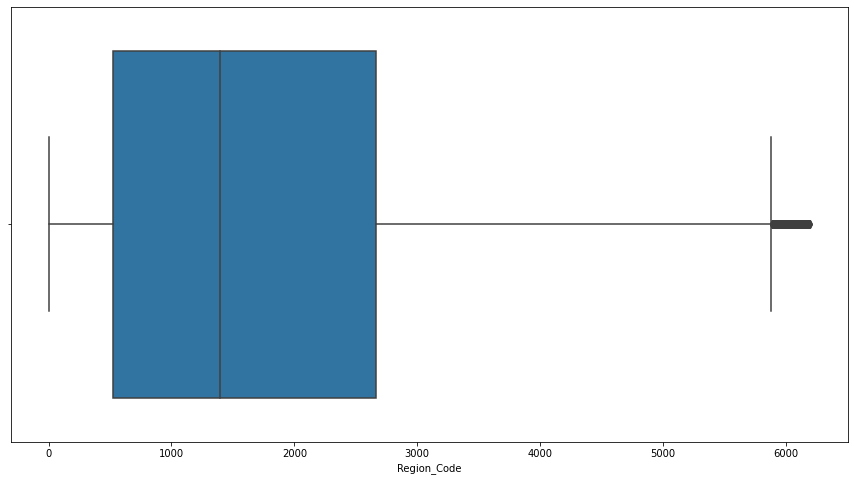

In [35]:
sns.boxplot(train_df["Region_Code"])
plt.show()

In [36]:
train_df.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Is_Spouse', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'],
      dtype='object')

In [37]:
train_df["City_Code"].value_counts(ascending = True)

C31      15
C36      36
C35      56
C30      58
C34     130
C32     160
C28     285
C33     286
C27     295
C25     366
C29     387
C26     499
C22     516
C24     551
C23     587
C21     679
C14     746
C18     797
C12     868
C19     899
C20     926
C13    1005
C16    1135
C11    1147
C17    1159
C15    1186
C5     1364
C10    1611
C8     1806
C7     1909
C6     1950
C9     2185
C4     3671
C3     4889
C2     7745
C1     8971
Name: City_Code, dtype: int64

In [38]:
Zone_C1 = ["C1" , "C2" ,"C3" , "C4" , "C5" , "C6" , "C7" , "C8", "C9" , "C10"]
Zone_C2 = ["C11" , "C12" , "C13" , "C14", "C15" , "C16", "C17" , "C18", "C19" , "C20"]
Zone_C3 = ["C21" , "C22" , "C23" , "C24", "C25" , "C26", "C27" , "C28", "C29" , "C30"]

def city_code(x):
    if(x in Zone_C1):
        return ("Zone C1")
    elif(x in Zone_C2):
        return ("Zone C2")
    elif(x in Zone_C3):
        return ("Zone C3")
    else:
        return("Zone C4")
train_df["city_code"] = train_df["City_Code"].apply(city_code)

In [39]:
test_df["city_code"] = test_df["City_Code"].apply(city_code)

In [40]:
train_df["city_code"].value_counts()

Zone C1    36101
Zone C2     9868
Zone C3     4223
Zone C4      683
Name: city_code, dtype: int64

In [41]:
train_df["Accomodation_Type"].value_counts()

Owned     27946
Rented    22929
Name: Accomodation_Type, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_df["Accomodation_Type"] = lb.fit_transform(train_df["Accomodation_Type"])
test_df["Accomodation_Type"] = lb.fit_transform(test_df["Accomodation_Type"])

In [43]:
train_df["Reco_Insurance_Type"] = lb.fit_transform(train_df["Reco_Insurance_Type"])
test_df["Reco_Insurance_Type"] = lb.fit_transform(test_df["Reco_Insurance_Type"])

In [44]:
train_df["Is_Spouse"] = lb.fit_transform(train_df["Is_Spouse"])
test_df["Is_Spouse"] = lb.fit_transform(test_df["Is_Spouse"])

In [45]:
train_df["city_code"] = lb.fit_transform(train_df["city_code"])
test_df["city_code"] = lb.fit_transform(test_df["city_code"])

In [46]:
Low_Prem = [1, 2 ,3 , 4 , 5 , 6 , 7 , 8, 9 , 10]
Med_Prem = [11 , 12 , 13 , 14, 15 , 16, 17 ]
High_Prem = [18, 19,20, 21,22]

def policy_cat(x):
    if(x in Low_Prem):
        return ("Low_Prem")
    elif(x in Med_Prem):
        return ("Med_Prem")
    else:
        return("High_Prem")
train_df["Policy_cat"] = train_df["Reco_Policy_Cat"].apply(policy_cat)
test_df["Policy_cat"] = test_df["Reco_Policy_Cat"].apply(policy_cat)

In [47]:
train_df["Policy_cat"] = lb.fit_transform(train_df["Policy_cat"])
test_df["Policy_cat"] = lb.fit_transform(test_df["Policy_cat"])

In [48]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [49]:
train_df[["Upper_Age", "Reco_Policy_Premium", "Region_Code"]] = mms.fit_transform(train_df[["Upper_Age", "Reco_Policy_Premium", "Region_Code"]])

In [50]:
test_df[["Upper_Age", "Reco_Policy_Premium", "Region_Code"]] = mms.fit_transform(test_df[["Upper_Age", "Reco_Policy_Premium", "Region_Code"]])

In [51]:
train_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Response,city_code,Policy_cat
0,C3,0.518650,1,0,0.315789,0,22,0.235746,0,0,0
1,C5,0.180203,0,1,1.000000,0,22,0.711930,0,0,0
2,C5,0.602454,0,0,0.245614,0,19,0.130382,1,0,0
3,C24,0.706766,0,1,0.596491,0,19,0.390893,0,2,0
4,C8,0.353464,1,0,0.456140,0,16,0.204878,0,0,2


In [52]:
test_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,city_code,Policy_cat
0,C1,0.025065,0,0,0.210526,0,5,0.235009,0,1
1,C4,0.000970,0,1,0.894737,1,18,0.722007,0,0
2,C1,0.091041,1,0,0.175439,0,17,0.170286,0,2
3,C3,0.190168,1,0,0.087719,0,18,0.166587,0,0
4,C1,0.153622,0,0,1.000000,0,5,0.489669,0,1


In [53]:
X = train_df.drop(["City_Code", "Reco_Policy_Cat", "Response"], inplace = False, axis =1)
y = train_df["Response"]

In [54]:
test_data = test_df.drop(["City_Code", "Reco_Policy_Cat"], inplace = False, axis =1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [67]:
#Regressions
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import scikitplot as skplt
#Evalution Metrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [58]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [59]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 30946, 1: 9754})
After SMOTE: Counter({1: 30946, 0: 30946})


In [102]:
class_weight = (train_df["Response"].value_counts()[0]/ train_df["Response"].value_counts()[1]) 

In [109]:
et = ExtraTreesRegressor(n_jobs=-1,n_estimators=500)
rf = RandomForestClassifier(max_depth=8,bootstrap=True,n_jobs=-1,n_estimators=200,max_features='sqrt', class_weight = {0:1, 1:class_weight})
xgb = xgboost.XGBRegressor(n_jobs=-1,colsample_bytree=0.7, learning_rate=0.07,
                           max_depth=5, min_child_weight=4, n_estimators=500,nthread=4, subsample=0.7)
gbr = GradientBoostingRegressor(random_state=0)
xgb = xgboost.XGBRegressor(n_jobs=-1)
et = ExtraTreesRegressor(n_jobs=-1)
ds = DecisionTreeRegressor()
catboost_reg = CatBoostClassifier()

In [110]:
pipelines = {
"LinearRegression": LinearRegression(),
"AdaBoostRegressor":AdaBoostClassifier(random_state=0, n_estimators=100),
"ElasticNet":ElasticNet(random_state=0),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestClassifier(n_jobs=-1),
"XGBRegressor":xgboost.XGBRegressor(n_jobs=-1, scale_pos_weight = class_weight),
"LGBM": LGBMClassifier(boosting_type='gbdt',num_leaves=31,max_depth=-1,learning_rate=0.1,n_estimators=150,subsample_for_bin=200000),
"CatBoostRegressor":CatBoostClassifier(iterations=900, depth=5, learning_rate=0.05,loss_function = 'Logloss')
}

In [111]:
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in pipelines.items():
    if name == 'CatBoostRegressor':
        model.fit(X_train_smote, y_train_smote,verbose=False)
    else:
        model.fit(X_train_smote, y_train_smote)
    #y_test_pre = model.predict(test_df)
    predict_test  = model.predict(X_test)
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("-----Training Data Evaluation-----")
    print("Accuracy Score:", accuracy_score(y_test, predict_test.round()))
    print("Precision: ", precision_score(y_test, predict_test.round()))
    print("Recall Score: ", recall_score(y_test ,predict_test.round()))
    print("F1 score: ", f1_score( y_test, predict_test.round()))
    dic["Model"].append(name)

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evaluation-----
Accuracy Score: 0.5448113207547169
Precision:  0.25034387895460797
Recall Score:  0.4449877750611247
F1 score:  0.3204225352112676
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.5037342767295597
Precision:  0.2705091937765205
Recall Score:  0.6234718826405868
F1 score:  0.37731196054254007
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evaluation-----
Accuracy Score: 0.7588443396226415
Precision:  0.0
Recall Score:  0.0
F1 score:  0.0
--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.5509040880503144
Precision:  0.27565733672603904
Recall Score:  0.5297473512632437
F1 score:  0.3626220362622037
------------------------------

In [406]:
import pickle
# open a file, where you ant to store the data
file = open('XGBRegressor.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)

In [313]:
test_data

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Premium,Response,city_code,Policy_cat
0,0.518650,1,0,0.315789,0,0.235746,0,0,0
1,0.180203,0,1,1.000000,0,0.711930,0,0,0
2,0.602454,0,0,0.245614,0,0.130382,1,0,0
3,0.706766,0,1,0.596491,0,0.390893,0,2,0
4,0.353464,1,0,0.456140,0,0.204878,0,0,2
...,...,...,...,...,...,...,...,...,...
50877,0.136283,1,0,0.070175,0,0.136787,0,0,0
50878,0.676086,1,0,0.157895,0,0.078885,0,0,1
50879,0.071209,1,0,0.789474,0,0.229341,0,0,2
50880,0.000484,0,1,0.929825,0,0.653149,1,0,2


In [407]:
result = xgb.predict(test_data)
res = pd.DataFrame({"ID" : test["ID"],
                    "Response": result})
res

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0


In [408]:
res.to_csv("XGBRegressor.csv", index = False)

## Over Sampling

In [106]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.75)
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)

In [107]:
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in pipelines.items():
    if name == 'CatBoostRegressor':
        model.fit(X_train_ns, y_train_ns,verbose=False)
    else:
        model.fit(X_train_ns, y_train_ns)
    #y_test_pre = model.predict(test_df)
    predict_test  = model.predict(X_test)
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("-----Training Data Evaluation-----")
    print("Accuracy Score:", accuracy_score(y_test, predict_test.round()))
    print("Precision: ", precision_score(y_test, predict_test.round()))
    print("Recall Score: ", recall_score(y_test ,predict_test.round()))
    print("F1 score: ", f1_score( y_test, predict_test.round()))
    dic["Model"].append(name)

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evaluation-----
Accuracy Score: 0.7588443396226415
Precision:  0.0
Recall Score:  0.0
F1 score:  0.0
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.7374213836477987
Precision:  0.28112449799196787
Recall Score:  0.05704971475142624
F1 score:  0.0948509485094851
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evaluation-----
Accuracy Score: 0.7588443396226415
Precision:  0.0
Recall Score:  0.0
F1 score:  0.0
--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.7327044025157232
Precision:  0.28338762214983715
Recall Score:  0.07090464547677261
F1 score:  0.1134289439374185
--------------------------------------------------------------
Model: Deci

In [88]:
mod = CatBoostClassifier()
mod.fit(X_train_ns, y_train_ns)

Learning rate set to 0.05665
0:	learn: 0.6908711	total: 24ms	remaining: 24s
1:	learn: 0.6887899	total: 47.1ms	remaining: 23.5s
2:	learn: 0.6868701	total: 71ms	remaining: 23.6s
3:	learn: 0.6850940	total: 93.6ms	remaining: 23.3s
4:	learn: 0.6834152	total: 116ms	remaining: 23.1s
5:	learn: 0.6820617	total: 136ms	remaining: 22.5s
6:	learn: 0.6808086	total: 158ms	remaining: 22.3s
7:	learn: 0.6795823	total: 180ms	remaining: 22.3s
8:	learn: 0.6785506	total: 204ms	remaining: 22.5s
9:	learn: 0.6776959	total: 231ms	remaining: 22.9s
10:	learn: 0.6769756	total: 253ms	remaining: 22.7s
11:	learn: 0.6762070	total: 282ms	remaining: 23.2s
12:	learn: 0.6755391	total: 302ms	remaining: 23s
13:	learn: 0.6749303	total: 322ms	remaining: 22.6s
14:	learn: 0.6744787	total: 339ms	remaining: 22.3s
15:	learn: 0.6739802	total: 360ms	remaining: 22.2s
16:	learn: 0.6734264	total: 384ms	remaining: 22.2s
17:	learn: 0.6728833	total: 408ms	remaining: 22.3s
18:	learn: 0.6724066	total: 430ms	remaining: 22.2s
19:	learn: 0.672

165:	learn: 0.6558164	total: 4.23s	remaining: 21.3s
166:	learn: 0.6557274	total: 4.25s	remaining: 21.2s
167:	learn: 0.6556500	total: 4.27s	remaining: 21.2s
168:	learn: 0.6555583	total: 4.29s	remaining: 21.1s
169:	learn: 0.6555018	total: 4.32s	remaining: 21.1s
170:	learn: 0.6554039	total: 4.34s	remaining: 21.1s
171:	learn: 0.6553423	total: 4.36s	remaining: 21s
172:	learn: 0.6552804	total: 4.38s	remaining: 20.9s
173:	learn: 0.6552002	total: 4.4s	remaining: 20.9s
174:	learn: 0.6551287	total: 4.43s	remaining: 20.9s
175:	learn: 0.6550474	total: 4.46s	remaining: 20.9s
176:	learn: 0.6549825	total: 4.49s	remaining: 20.9s
177:	learn: 0.6548961	total: 4.52s	remaining: 20.9s
178:	learn: 0.6547858	total: 4.54s	remaining: 20.8s
179:	learn: 0.6547227	total: 4.58s	remaining: 20.8s
180:	learn: 0.6546650	total: 4.61s	remaining: 20.8s
181:	learn: 0.6545459	total: 4.63s	remaining: 20.8s
182:	learn: 0.6544766	total: 4.65s	remaining: 20.8s
183:	learn: 0.6544140	total: 4.68s	remaining: 20.8s
184:	learn: 0.6

326:	learn: 0.6421016	total: 8.41s	remaining: 17.3s
327:	learn: 0.6420349	total: 8.44s	remaining: 17.3s
328:	learn: 0.6419616	total: 8.46s	remaining: 17.3s
329:	learn: 0.6418696	total: 8.48s	remaining: 17.2s
330:	learn: 0.6417854	total: 8.51s	remaining: 17.2s
331:	learn: 0.6417084	total: 8.54s	remaining: 17.2s
332:	learn: 0.6416390	total: 8.56s	remaining: 17.1s
333:	learn: 0.6415667	total: 8.58s	remaining: 17.1s
334:	learn: 0.6414915	total: 8.6s	remaining: 17.1s
335:	learn: 0.6414315	total: 8.63s	remaining: 17.1s
336:	learn: 0.6413742	total: 8.66s	remaining: 17s
337:	learn: 0.6413020	total: 8.68s	remaining: 17s
338:	learn: 0.6412238	total: 8.7s	remaining: 17s
339:	learn: 0.6411821	total: 8.73s	remaining: 16.9s
340:	learn: 0.6410802	total: 8.75s	remaining: 16.9s
341:	learn: 0.6410125	total: 8.77s	remaining: 16.9s
342:	learn: 0.6409290	total: 8.79s	remaining: 16.8s
343:	learn: 0.6408513	total: 8.82s	remaining: 16.8s
344:	learn: 0.6407309	total: 8.85s	remaining: 16.8s
345:	learn: 0.640660

487:	learn: 0.6300120	total: 12.2s	remaining: 12.8s
488:	learn: 0.6299623	total: 12.2s	remaining: 12.8s
489:	learn: 0.6299020	total: 12.2s	remaining: 12.7s
490:	learn: 0.6298191	total: 12.3s	remaining: 12.7s
491:	learn: 0.6297386	total: 12.3s	remaining: 12.7s
492:	learn: 0.6296612	total: 12.3s	remaining: 12.7s
493:	learn: 0.6296134	total: 12.4s	remaining: 12.7s
494:	learn: 0.6295671	total: 12.4s	remaining: 12.6s
495:	learn: 0.6294692	total: 12.4s	remaining: 12.6s
496:	learn: 0.6293964	total: 12.5s	remaining: 12.6s
497:	learn: 0.6293053	total: 12.5s	remaining: 12.6s
498:	learn: 0.6292276	total: 12.5s	remaining: 12.6s
499:	learn: 0.6291581	total: 12.6s	remaining: 12.6s
500:	learn: 0.6291158	total: 12.6s	remaining: 12.6s
501:	learn: 0.6290284	total: 12.7s	remaining: 12.6s
502:	learn: 0.6289577	total: 12.7s	remaining: 12.5s
503:	learn: 0.6288706	total: 12.7s	remaining: 12.5s
504:	learn: 0.6287702	total: 12.8s	remaining: 12.5s
505:	learn: 0.6286924	total: 12.8s	remaining: 12.5s
506:	learn: 

648:	learn: 0.6187599	total: 16s	remaining: 8.68s
649:	learn: 0.6187070	total: 16.1s	remaining: 8.65s
650:	learn: 0.6186161	total: 16.1s	remaining: 8.63s
651:	learn: 0.6185662	total: 16.1s	remaining: 8.6s
652:	learn: 0.6184895	total: 16.1s	remaining: 8.57s
653:	learn: 0.6184365	total: 16.1s	remaining: 8.54s
654:	learn: 0.6183721	total: 16.2s	remaining: 8.52s
655:	learn: 0.6182780	total: 16.2s	remaining: 8.49s
656:	learn: 0.6182177	total: 16.2s	remaining: 8.46s
657:	learn: 0.6181658	total: 16.2s	remaining: 8.44s
658:	learn: 0.6180835	total: 16.3s	remaining: 8.41s
659:	learn: 0.6180519	total: 16.3s	remaining: 8.39s
660:	learn: 0.6179955	total: 16.3s	remaining: 8.36s
661:	learn: 0.6179504	total: 16.3s	remaining: 8.33s
662:	learn: 0.6178691	total: 16.3s	remaining: 8.31s
663:	learn: 0.6177841	total: 16.4s	remaining: 8.28s
664:	learn: 0.6177050	total: 16.4s	remaining: 8.25s
665:	learn: 0.6176643	total: 16.4s	remaining: 8.23s
666:	learn: 0.6175962	total: 16.4s	remaining: 8.2s
667:	learn: 0.61

811:	learn: 0.6084275	total: 20s	remaining: 4.63s
812:	learn: 0.6083657	total: 20s	remaining: 4.61s
813:	learn: 0.6083268	total: 20.1s	remaining: 4.58s
814:	learn: 0.6082186	total: 20.1s	remaining: 4.56s
815:	learn: 0.6081563	total: 20.1s	remaining: 4.53s
816:	learn: 0.6081133	total: 20.1s	remaining: 4.51s
817:	learn: 0.6080624	total: 20.1s	remaining: 4.48s
818:	learn: 0.6080077	total: 20.2s	remaining: 4.46s
819:	learn: 0.6079536	total: 20.2s	remaining: 4.43s
820:	learn: 0.6078970	total: 20.2s	remaining: 4.41s
821:	learn: 0.6078444	total: 20.2s	remaining: 4.38s
822:	learn: 0.6077629	total: 20.3s	remaining: 4.36s
823:	learn: 0.6077150	total: 20.3s	remaining: 4.33s
824:	learn: 0.6076648	total: 20.3s	remaining: 4.31s
825:	learn: 0.6076118	total: 20.3s	remaining: 4.28s
826:	learn: 0.6075406	total: 20.4s	remaining: 4.26s
827:	learn: 0.6075035	total: 20.4s	remaining: 4.23s
828:	learn: 0.6074656	total: 20.4s	remaining: 4.21s
829:	learn: 0.6074263	total: 20.4s	remaining: 4.18s
830:	learn: 0.60

974:	learn: 0.5989100	total: 23.8s	remaining: 610ms
975:	learn: 0.5988584	total: 23.8s	remaining: 585ms
976:	learn: 0.5988245	total: 23.8s	remaining: 561ms
977:	learn: 0.5987734	total: 23.9s	remaining: 537ms
978:	learn: 0.5987174	total: 23.9s	remaining: 513ms
979:	learn: 0.5986636	total: 24s	remaining: 489ms
980:	learn: 0.5986148	total: 24s	remaining: 465ms
981:	learn: 0.5985325	total: 24s	remaining: 441ms
982:	learn: 0.5984950	total: 24.1s	remaining: 416ms
983:	learn: 0.5984528	total: 24.1s	remaining: 392ms
984:	learn: 0.5983902	total: 24.1s	remaining: 367ms
985:	learn: 0.5983521	total: 24.1s	remaining: 343ms
986:	learn: 0.5982870	total: 24.2s	remaining: 318ms
987:	learn: 0.5982417	total: 24.2s	remaining: 294ms
988:	learn: 0.5981777	total: 24.2s	remaining: 269ms
989:	learn: 0.5981423	total: 24.2s	remaining: 245ms
990:	learn: 0.5980931	total: 24.3s	remaining: 220ms
991:	learn: 0.5980551	total: 24.3s	remaining: 196ms
992:	learn: 0.5980233	total: 24.3s	remaining: 171ms
993:	learn: 0.5979

In [457]:
y_pred_ns = mod.predict(X_test)

In [115]:
from sklearn.model_selection import KFold
n = 10
kf = KFold(n_splits = n, shuffle = True)

In [116]:
def acc_scores(model, X_train, y_train, X_test, y_test):
    pred_model = model.fit(X_train_smote, y_train_smote).predict(X_test).round()
    return (accuracy_score(y_test, pred_model))

In [120]:
scores = []
mod = RandomForestClassifier()

for i in range(n):
    results = next(kf.split(X)) # can see what all will iterate and return the values
    X_train = X.iloc[results[0]]
    X_test = X.iloc[results[1]]
    y_train = y.iloc[results[0]]
    y_test = y.iloc[results[1]]
    # print("X_train Dim: ", Xtrain.shape,  "Fold: ", i )
    # print("X_test Dim: ", Xtest.shape, "Fold: ", i)
    # print("y_train Dim: ", ytrain.shape, "Fold: ", i)
    # print("y_test Dim: ", ytest.shape, "Fold: ", i)
    scores.append(acc_scores(mod, X_train, y_train, X_test, y_test))
    
print("All Scores: ", scores)

All Scores:  [0.9259040880503144, 0.9290487421383647, 0.9272798742138365, 0.93062106918239, 0.9284591194968553, 0.9290487421383647, 0.9325864779874213, 0.9296383647798742, 0.9302279874213837, 0.9282625786163522]


In [462]:
import pickle
# open a file, where you ant to store the data
file = open('GradientBoost.pkl', 'wb')

# dump information to that file
pickle.dump(mod, file)

In [463]:
result = mod.predict(test_data)
res = pd.DataFrame({"ID" : test["ID"],
                    "Response": result})
res

,ID,Response
0,50883,0.448815
1,50884,0.436720
2,50885,0.434903
3,50886,0.425084
4,50887,0.424405
...,...,...
21800,72683,0.430862
21801,72684,0.431472
21802,72685,0.433525
21803,72686,0.421117


In [464]:
res.to_csv("GradientBoost2.csv", index = False)

In [417]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in extra tree
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4, 5, 10]

In [418]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [422]:
gbr = RandomizedSearchCV(estimator = mod, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = 1)

In [423]:
gbr.fit(X_train_ns, y_train_ns)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   6.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   7.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   1.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=  16.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=  17.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=  31.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [424]:
gbr.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 25}

In [425]:
y_pred_hp = gbr.predict(X_test)

In [426]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_hp.round()))

Accuracy Score: 0.6941523341523341


In [427]:
print("Precision: ", precision_score(y_test, y_pred_hp.round()))
print("Recall Score: ", recall_score(y_test ,y_pred_hp.round()))
print("F1 score: ", f1_score(y_test, y_pred_hp.round()))

Precision:  0.27887139107611547
Recall Score:  0.17432321575061527
F1 score:  0.21453811206461385


In [428]:
import pickle
# open a file, where you ant to store the data
file = open('GradientBoostHyper.pkl', 'wb')

# dump information to that file
pickle.dump(gbr, file)

In [174]:
X_train_ns.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,city_code
0,2989,0,1,38,1,21,21351.0,0
1,491,1,0,65,0,3,20160.0,0
2,2923,1,0,47,0,19,13442.0,0
3,904,1,0,18,0,15,2408.0,1
4,600,0,0,46,0,16,13662.0,2


In [429]:
result = gbr.predict(test_data)
res = pd.DataFrame({"ID" : test["ID"],
                    "Response": result})
res

,ID,Response
0,50883,0.455032
1,50884,0.415921
2,50885,0.119199
3,50886,0.194626
4,50887,0.254277
...,...,...
21800,72683,0.284243
21801,72684,0.025699
21802,72685,0.219179
21803,72686,0.612938


In [430]:
res.to_csv("GradientBoostingHyper.csv", index = False)